In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition
from tqdm import tqdm

from KNN import KNN

In [84]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')

db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

og_train_x, og_test_x, train_y, test_y = train_test_split(db1_data, db1_labels, test_size=0.33)

og_train_x = og_train_x.reshape(-1, 32*32, 3)
og_test_x = og_test_x.reshape(-1, 32*32, 3)

In [35]:
def to_grayscale(x):
    new_x = x[:,:,0] * 0.3 + x[:, :, 1] * 0.59 + x[:, :, 2] * 0.11
    return new_x.astype(int)

In [85]:
train_x = to_grayscale(og_train_x)
test_x = to_grayscale(og_test_x)

100%|██████████| 9/9 [03:33<00:00, 23.77s/it]


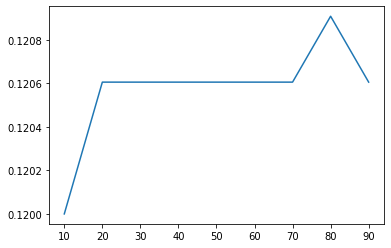

In [63]:
NCOMPS = np.arange(10, 100, 10)
acc = []
for n_comp in tqdm(NCOMPS, position=0, leave=True):
    kpca = decomposition.KernelPCA(n_components=n_comp, kernel='cosine')
    train_proj = kpca.fit_transform(train_x)
    test_proj = kpca.transform(test_x)
    
    train_proj += 1
    test_proj += 1
    
    clf = MultinomialNB()
    
    clf.fit(train_proj, train_y)
    
    acc.append(np.count_nonzero(clf.predict(test_proj) == test_y) / len(test_y))
    
plt.plot(NCOMPS, acc)

100%|██████████| 5/5 [02:10<00:00, 26.20s/it]


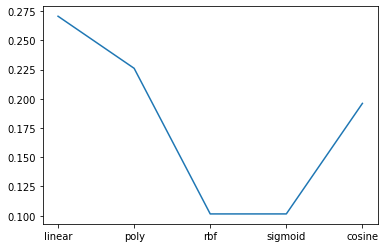

In [86]:
KERNELS = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
acc = []
for k in tqdm(KERNELS, position=0, leave=True):
    kpca = decomposition.KernelPCA(n_components=30, kernel=k)
    train_proj = kpca.fit_transform(train_x)
    test_proj = kpca.transform(test_x)
    
    d = min(np.min(train_proj), np.min(test_proj))
    
    train_proj -= d
    test_proj -= d
    
    clf = MultinomialNB()
    
    clf.fit(train_proj, train_y)
    
    acc.append(np.count_nonzero(clf.predict(test_proj) == test_y) / len(test_y))
    
plt.plot(KERNELS, acc)

In [66]:
kpca = decomposition.KernelPCA(n_components=30, kernel='cosine')
train_proj = kpca.fit_transform(train_x)
test_proj = kpca.transform(test_x)

In [67]:
train_proj += 1
test_proj += 1

In [68]:
clf = MultinomialNB()

In [69]:
clf.fit(train_proj, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
np.count_nonzero(clf.predict(test_proj) == test_y) / len(test_y)

0.1206060606060606

In [57]:
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([689, 643, 675, 690, 653, 626, 723, 653, 689, 659]))